In [5]:
import sklearn
print(sklearn.__version__)


1.7.0


In [6]:
import zipfile
import os

zip_path = r"C:\All folders\projects\house-prices-advanced-regression-techniques N.zip"
extract_to = r"C:\All folders\projects\house-prices-data"

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Files extracted to:", extract_to)
print("Extracted files:", os.listdir(extract_to))



Files extracted to: C:\All folders\projects\house-prices-data
Extracted files: ['data_description.txt', 'sample_submission.csv', 'test.csv', 'train.csv']


In [7]:
import pandas as pd

train = pd.read_csv(r"C:\All folders\projects\house-prices-data\train.csv")
test = pd.read_csv(r"C:\All folders\projects\house-prices-data\test.csv")

print("Train shape:", train.shape)
train.head()


Train shape: (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head()


Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


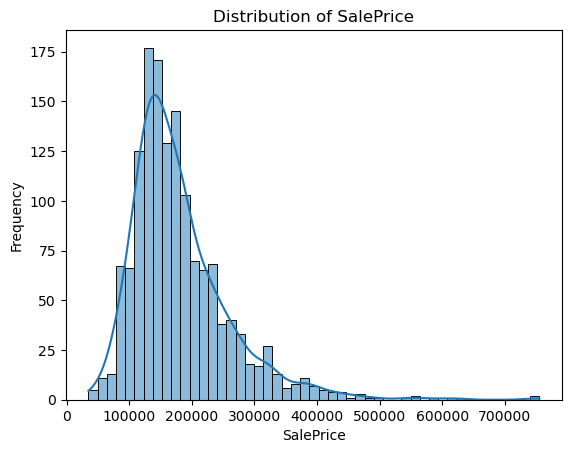

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


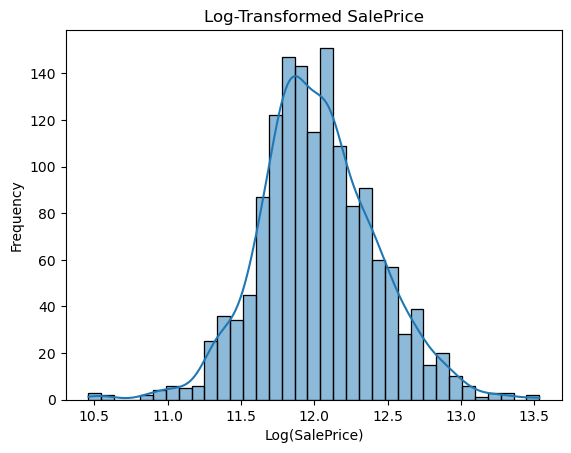

In [10]:
import numpy as np

train['LogSalePrice'] = np.log1p(train['SalePrice'])
sns.histplot(train['LogSalePrice'], kde=True)
plt.title("Log-Transformed SalePrice")
plt.xlabel("Log(SalePrice)")
plt.ylabel("Frequency")
plt.show()


In [11]:
numeric_features = train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train.select_dtypes(include=['object']).columns.tolist()

print(f"Numeric Features: {len(numeric_features)}")
print(f"Categorical Features: {len(categorical_features)}")


Numeric Features: 39
Categorical Features: 43


In [12]:
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)


Missing values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [13]:
drop_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
train = train.drop(columns=drop_cols)


In [14]:
cat_fill_none = [
    'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
    'BsmtFinType1', 'BsmtCond', 'BsmtQual'
]

for col in cat_fill_none:
    train[col] = train[col].fillna("None")


In [15]:
# Fill MasVnrArea with 0 (no masonry)
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)

# Fill GarageYrBlt with 0 (no garage)
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(0)

# Fill LotFrontage with median value (not all homes have it missing)
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())


In [16]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])


In [17]:
print("Remaining missing values in train set:")
print(train.isnull().sum().sort_values(ascending=False).head(10))


Remaining missing values in train set:
Id              0
HalfBath        0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
FullBath        0
dtype: int64


In [18]:
# Drop columns with too many missing values (over 80%)
drop_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
test = test.drop(columns=drop_cols)


In [19]:
# Fill missing categorical values with 'None'
cat_fill_none = [
    'MasVnrType', 'FireplaceQu', 'GarageType', 'GarageFinish', 
    'GarageQual', 'GarageCond', 'BsmtFinType2', 'BsmtExposure',
    'BsmtFinType1', 'BsmtCond', 'BsmtQual'
]

for col in cat_fill_none:
    test[col] = test[col].fillna("None")


In [20]:
# Fill missing numeric values with 0 or median (safe default)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(0)
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())


In [21]:
# Fill the few missing values for these extra cases
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])
test['Functional'] = test['Functional'].fillna(test['Functional'].mode()[0])


In [22]:
print("Test set missing values:\n", test.isnull().sum().sort_values(ascending=False).head(10))


Test set missing values:
 MSZoning        4
BsmtFullBath    2
BsmtHalfBath    2
TotalBsmtSF     1
BsmtUnfSF       1
BsmtFinSF2      1
BsmtFinSF1      1
GarageCars      1
GarageArea      1
BedroomAbvGr    0
dtype: int64


In [23]:
# Mode fill: most common value (like picking the class favorite)
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0)
test['BsmtHalfBath'] = test['BsmtHalfBath'].fillna(0)
test['GarageCars'] = test['GarageCars'].fillna(0)
test['GarageArea'] = test['GarageArea'].fillna(0)
test['BsmtUnfSF'] = test['BsmtUnfSF'].fillna(0)


In [24]:
print("Test set missing values AFTER second cleanup:\n")
print(test.isnull().sum().sort_values(ascending=False).head(10))


Test set missing values AFTER second cleanup:

TotalBsmtSF     1
BsmtFinSF2      1
BsmtFinSF1      1
Id              0
FullBath        0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
dtype: int64


In [25]:
# Only drop columns that actually exist in the test set
drop_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence']
drop_cols_existing = [col for col in drop_cols if col in test.columns]
test = test.drop(columns=drop_cols_existing)


In [26]:
print("Test set missing values:\n")
print(test.isnull().sum().sort_values(ascending=False).head(10))


Test set missing values:

TotalBsmtSF     1
BsmtFinSF2      1
BsmtFinSF1      1
Id              0
FullBath        0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
BedroomAbvGr    0
dtype: int64


In [27]:
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(0)
test['BsmtFinSF1'] = test['BsmtFinSF1'].fillna(0)
test['BsmtFinSF2'] = test['BsmtFinSF2'].fillna(0)


In [28]:
print("Final missing values in test set:\n")
print(test.isnull().sum().sort_values(ascending=False).head(5))


Final missing values in test set:

Id              0
FullBath        0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
dtype: int64


In [29]:
# Save cleaned training set
train.to_csv("cleaned_train.csv", index=False)

# Save cleaned test set
test.to_csv("cleaned_test.csv", index=False)

print("Cleaned files saved as 'cleaned_train.csv' and 'cleaned_test.csv'")


Cleaned files saved as 'cleaned_train.csv' and 'cleaned_test.csv'


In [30]:
train['source'] = 'train'
test['source'] = 'test'
test['SalePrice'] = 0  # add dummy target to test so shapes match

full_data = pd.concat([train, test], axis=0)
print("Combined data shape:", full_data.shape)


Combined data shape: (2919, 79)


In [31]:
cat_cols = full_data.select_dtypes(include='object').columns.tolist()
cat_cols.remove('source')  # don't encode this
print("Categorical columns to encode:", cat_cols)


Categorical columns to encode: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [32]:
full_data = pd.get_dummies(full_data, columns=cat_cols, drop_first=True)
print("Shape after encoding:", full_data.shape)


Shape after encoding: (2919, 250)


In [33]:
final_train = full_data[full_data['source'] == 'train'].drop(['source'], axis=1)
final_test = full_data[full_data['source'] == 'test'].drop(['source', 'SalePrice'], axis=1)

print("Final train shape:", final_train.shape)
print("Final test shape:", final_test.shape)


Final train shape: (1460, 249)
Final test shape: (1459, 248)


In [34]:
!pip install lightgbm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import numpy as np


In [35]:
X = final_train.drop('SalePrice', axis=1)
y = final_train['SalePrice']


In [36]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf_scores = cross_val_score(rf, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("Random Forest RMSE:", -rf_scores.mean())


Random Forest RMSE: 4592.631347717131


In [37]:
xgb_model = xgb.XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
xgb_scores = cross_val_score(xgb_model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("XGBoost RMSE:", -xgb_scores.mean())


XGBoost RMSE: 5532.379931640625


In [38]:
# Replace spaces in feature names with underscores
X.columns = X.columns.str.replace(" ", "_")

lgb_model = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
lgb_scores = cross_val_score(lgb_model, X, y, scoring='neg_root_mean_squared_error', cv=5)
print("LightGBM RMSE:", -lgb_scores.mean())


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3651
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 167
[LightGBM] [Info] Start training from score 180717.091610


C:\Users\acer\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\acer\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\acer\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\acer\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3663
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 164
[LightGBM] [Info] Start training from score 180407.575342
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3654
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 166
[LightGBM] [Info] Start training from score 180007.375000
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3677
[LightGBM] [Info] Number of data points in the

In [39]:
# Final training on all data
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X, y)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
# Align test set to match training columns
final_test_aligned = final_test.reindex(columns=X.columns, fill_value=0)

# Predict on the aligned test set
test_preds = final_model.predict(final_test_aligned)



# Create submission file
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": test_preds
})
submission.to_csv("submission_rf.csv", index=False)
print("✅ Submission file saved: submission_rf.csv")



In [37]:
import os
print(os.getcwd())


C:\Users\acer
